# Introdução ao scikit-learn


O scikit-learn é uma biblioteca de código aberto em Python voltada para aprendizado de máquina. Ela fornece ferramentas simples e eficientes para análise preditiva de dados. É construída sobre outras bibliotecas como NumPy, SciPy e Matplotlib, e é amplamente utilizada pela comunidade de ciência de dados.

**Por que usar o scikit-learn?**

**Simplicidade e Consistência:** Interface simples e consistente para treinamento e avaliação de modelos.

**Diversidade de Algoritmos:** Implementa uma ampla gama de algoritmos de aprendizado supervisionado e não supervisionado.

**Documentação Abrangente:** Excelente documentação e tutoriais.

**Comunidade Ativa:** Grande comunidade de usuários e desenvolvedores.

Neste material vamos utilizar o scikit-learn para Construção de Modelos Preditivos:

1. **Divisão da base para treinamento**
2. **Pré-processamento (Normalização, Codificação, Seleção de Variáveis, Redução de Dimensionalidade)**
3. **Treinamento do Modelo**
4. **Avaliação e interpretação dos resultados**
5. **Ajuste de Hiperparâmetros**


## Divisão da base para treinamento

In [ ]:
##### Carregando dados para exemplos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Carregar o conjunto de dados
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target, name='MedHouseVal')

### Divisão Simples em Treino e Teste (Holdout Method)

Dividir o conjunto de dados em duas partes distintas:

* **Conjunto de Treinamento:** Usado para treinar o modelo.
* **Conjunto de Teste:** Usado para avaliar o desempenho do modelo em dados não vistos.

* **Divisões comuns:** (70% ou 80%) - treino; (30% ou 20%) - teste

**Vantagens**:
* Simples e rápido.
* Útil para conjuntos de dados grandes.

**Desvantagens**:
* O desempenho pode variar dependendo de como os dados são divididos.
* Pode não ser representativo se o conjunto for pequeno.

Exemplo de como fazer usando o scikit-learn:

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Divisão em Treino, Validação e Teste

Além de separar em treino e teste, introduzimos um Conjunto de Validação:

* **Conjunto de Treinamento:** Para ajustar o modelo.

* **Conjunto de Validação:** Para ajustar hiperparâmetros e evitar overfitting.

* **Conjunto de Teste:** Para avaliação final.


**Vantagens:**

* Permite ajustar hiperparâmetros sem usar o conjunto de teste.

* Melhor estimativa da performance em dados desconhecidos.

**Desvantagens:**

* Menos dados disponíveis para treinamento.

* Pode ser problemático em conjuntos pequenos.

Exemplo em Python:

In [ ]:
# Primeiro, dividir em treino e teste
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Em seguida, dividir o conjunto de treino em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2


### Validação Cruzada (Cross-Validation)

Método que divide os dados em K subconjuntos (folds). O modelo é treinado K vezes, cada vez usando um fold diferente como conjunto de teste e os demais para treinamento.


**Vantagens:**
* Usa todos os dados para treinamento  e teste.
* Fornece uma estimativa mais robusta da performance.

**Desvantagens:**
* Mais custoso computacionalmente.
* Pode ser complexo interpretar resultados diferentes em cada fold.




In [ ]:
from sklearn.datasets import load_iris

# Carregar o conjunto de dados
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='target')


In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Instanciar o modelo
model = RandomForestClassifier()

# Definir K-Folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Avaliar o modelo usando cross-validation
scores = cross_val_score(model, X, y, cv=kf)

print(f"Acurácias em cada fold: {scores}")
print(f"Acurácia média: {scores.mean()}")


Acurácias em cada fold: [1.         0.96666667 0.93333333 0.93333333 0.96666667]
Acurácia média: 0.9600000000000002


## Pré-processamento

### Normalização

A normalização é usada para transformar variáveis numéricas em uma escala comum, o que é especialmente importante para algoritmos sensíveis à magnitude dos dados, como Regressão Linear.

<br/>

**Técnicas Comuns de Normalização**

**Min-Max Scaling:** Transforma os valores para um intervalo específico (geralmente [0, 1]).

**Standardization (Z-score):** Transforma os valores para ter média 0 e desvio padrão 1.

In [ ]:
from sklearn.datasets import load_iris

# Carregar o conjunto de dados
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='target')


In [ ]:
from sklearn.model_selection import train_test_split

# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,120.000000,120.000000,120.000000,120.000000
mean,5.809167,3.061667,3.726667,1.183333
std,0.823805,0.449123,1.752345,0.752289
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.500000,0.300000
50%,5.750000,3.000000,4.250000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,7.700000,4.400000,6.700000,2.500000


#### Min-Max Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Min-Max Scaling
scaler = MinMaxScaler()
X_train_minmax = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

print("Min-Max Scaling:\n")
X_train_minmax.describe()

Min-Max Scaling:



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,120.000000,120.000000,120.000000,120.000000
mean,0.443873,0.442361,0.478363,0.451389
std,0.242296,0.187135,0.307429,0.313454
min,0.000000,0.000000,0.000000,0.000000
25%,0.235294,0.333333,0.087719,0.083333
50%,0.426471,0.416667,0.570175,0.500000
75%,0.617647,0.583333,0.719298,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_test_minmax = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

print("Min-Max Scaling:\n")
X_test_minmax.describe()

Min-Max Scaling:



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,30.000000,30.000000,30.000000,30.000000
mean,0.494118,0.433333,0.505848,0.484722
std,0.248537,0.160295,0.323036,0.337879
min,0.117647,0.083333,0.052632,0.000000
25%,0.330882,0.333333,0.105263,0.093750
50%,0.514706,0.416667,0.614035,0.520833
75%,0.647059,0.500000,0.732456,0.791667
max,1.058824,0.750000,1.035088,0.916667


#### Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Standard Scaler
std_scaler = StandardScaler()
X_train_standard = pd.DataFrame(std_scaler.fit_transform(X_train), columns=X_train.columns)

print("Standardization TRAIN:\n")
X_train_standard.describe()

Standardization TRAIN:



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02
mean,1.754152e-15,-1.694940e-15,-2.294461e-16,-2.960595e-17
std,1.004193e+00,1.004193e+00,1.004193e+00,1.004193e+00
min,-1.839628e+00,-2.373778e+00,-1.562535e+00,-1.446088e+00
25%,-8.644522e-01,-5.850598e-01,-1.276006e+00,-1.179118e+00
50%,-7.212234e-02,-1.378803e-01,2.998997e-01,1.557325e-01
75%,7.202076e-01,7.564785e-01,7.869979e-01,8.231577e-01
max,2.304867e+00,2.992376e+00,1.703889e+00,1.757553e+00


In [ ]:
X_test_standard = pd.DataFrame(std_scaler.transform(X_test), columns=X_test.columns)

print("Standardization TEST:\n")
X_test_standard.describe()

Standardization TEST:



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,30.000000,30.000000,30.000000,30.000000
mean,0.208241,-0.048444,0.089779,0.106788
std,1.030061,0.860167,1.055172,1.082443
min,-1.352040,-1.926598,-1.390618,-1.446088
25%,-0.468287,-0.585060,-1.218701,-1.145747
50%,0.293568,-0.137880,0.443164,0.222475
75%,0.842104,0.309299,0.829977,1.090128
max,2.548661,1.650837,1.818500,1.490583


### Codificação

Variáveis categóricas precisam ser transformadas em números para que modelos de machine learning possam processá-las. As técnicas mais comuns são:

<br/>

**Label Encoding:** Transforma cada categoria em um número inteiro.

**One-Hot Encoding:** Cria colunas binárias para cada categoria.



In [ ]:
from sklearn.datasets import load_diabetes
TRAIN_DATA_URL = "https://storage.googleapis.com/tf-datasets/titanic/train.csv"

# Carregar o conjunto de dados
titanic = pd.read_csv(TRAIN_DATA_URL)
X = titanic.drop('survived', axis=1)
y = titanic['survived']

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(501, 9)

In [ ]:
X_test.shape

(126, 9)

#### Label Encoding:
Transforma cada categoria em um número inteiro.

In [ ]:
X_train

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
332,male,48.0,0,0,26.5500,First,E,Southampton,y
6,female,27.0,0,2,11.1333,Third,unknown,Southampton,n
104,male,37.0,1,0,53.1000,First,C,Southampton,n
114,male,40.5,0,2,14.5000,Third,unknown,Southampton,n
482,male,36.0,0,1,512.3292,First,B,Cherbourg,n
...,...,...,...,...,...,...,...,...,...
71,male,46.0,1,0,61.1750,First,E,Southampton,n
106,male,24.0,0,0,79.2000,First,B,Cherbourg,y
270,male,19.0,0,0,8.0500,Third,unknown,Southampton,y
435,female,40.0,0,0,153.4625,First,C,Southampton,y


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Label Encoding
label_encoder = LabelEncoder()
X_train['class'] = label_encoder.fit_transform(X_train['class'])
print("Label Encoding class:\n", X_train)

Label Encoding class:
         sex   age  n_siblings_spouses  parch      fare  class     deck  \
332    male  48.0                   0      0   26.5500      0        E   
6    female  27.0                   0      2   11.1333      2  unknown   
104    male  37.0                   1      0   53.1000      0        C   
114    male  40.5                   0      2   14.5000      2  unknown   
482    male  36.0                   0      1  512.3292      0        B   
..      ...   ...                 ...    ...       ...    ...      ...   
71     male  46.0                   1      0   61.1750      0        E   
106    male  24.0                   0      0   79.2000      0        B   
270    male  19.0                   0      0    8.0500      2  unknown   
435  female  40.0                   0      0  153.4625      0        C   
102    male  23.0                   0      0   15.0458      1  unknown   

     embark_town alone  
332  Southampton     y  
6    Southampton     n  
104  Southamp

In [ ]:
X_test['class'] = label_encoder.transform(X_test['class'])
print("Label Encoding class:\n", X_test)

Label Encoding class:
         sex   age  n_siblings_spouses  parch     fare  class     deck  \
580    male   2.0                   4      1  39.6875      2  unknown   
590    male  28.0                   0      0   8.0500      2  unknown   
550    male  25.0                   0      0   7.0500      2  unknown   
213    male  24.0                   0      0   7.8958      2  unknown   
485    male  14.0                   5      2  46.9000      2  unknown   
..      ...   ...                 ...    ...      ...    ...      ...   
535    male  28.0                   0      0  14.5000      2  unknown   
319  female  45.0                   1      1  26.2500      1  unknown   
218  female  28.0                   0      0  12.3500      1        E   
344    male  34.0                   1      0  21.0000      1  unknown   
383  female  30.0                   0      0   8.6625      2  unknown   

     embark_town alone  
580  Southampton     n  
590  Southampton     y  
550  Southampton     y  


#### One-Hot Encoding:
Cria colunas binárias para cada categoria.


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# One-Hot Encoding
onehot_encoder = OneHotEncoder(sparse_output=False)
sex_train_onehot_encoded = onehot_encoder.fit_transform(X_train[['sex']])
X_train_onehot = pd.DataFrame(sex_train_onehot_encoded, columns=onehot_encoder.get_feature_names_out(['sex']))

X_train = pd.concat([X_train.drop('sex', axis=1).reset_index(drop=True), X_train_onehot], axis=1)

print("One-Hot Encoding:\n", X_train)


One-Hot Encoding:
       age  n_siblings_spouses  parch      fare  class     deck  embark_town  \
0    48.0                   0      0   26.5500      0        E  Southampton   
1    27.0                   0      2   11.1333      2  unknown  Southampton   
2    37.0                   1      0   53.1000      0        C  Southampton   
3    40.5                   0      2   14.5000      2  unknown  Southampton   
4    36.0                   0      1  512.3292      0        B    Cherbourg   
..    ...                 ...    ...       ...    ...      ...          ...   
496  46.0                   1      0   61.1750      0        E  Southampton   
497  24.0                   0      0   79.2000      0        B    Cherbourg   
498  19.0                   0      0    8.0500      2  unknown  Southampton   
499  40.0                   0      0  153.4625      0        C  Southampton   
500  23.0                   0      0   15.0458      1  unknown    Cherbourg   

    alone  sex_female  sex_male 

In [ ]:
sex_test_onehot_encoded = onehot_encoder.fit_transform(X_test[['sex']])
X_test_onehot = pd.DataFrame(sex_test_onehot_encoded, columns=onehot_encoder.get_feature_names_out(['sex']))
X_test = pd.concat([X_test.drop('sex', axis=1).reset_index(drop=True), X_test_onehot], axis=1)

print("One-Hot Encoding:\n", X_test)

One-Hot Encoding:
       age  n_siblings_spouses  parch     fare  class     deck  embark_town  \
0     2.0                   4      1  39.6875      2  unknown  Southampton   
1    28.0                   0      0   8.0500      2  unknown  Southampton   
2    25.0                   0      0   7.0500      2  unknown  Southampton   
3    24.0                   0      0   7.8958      2  unknown  Southampton   
4    14.0                   5      2  46.9000      2  unknown  Southampton   
..    ...                 ...    ...      ...    ...      ...          ...   
121  28.0                   0      0  14.5000      2  unknown  Southampton   
122  45.0                   1      1  26.2500      1  unknown  Southampton   
123  28.0                   0      0  12.3500      1        E   Queenstown   
124  34.0                   1      0  21.0000      1  unknown  Southampton   
125  30.0                   0      0   8.6625      2  unknown  Southampton   

    alone  sex_female  sex_male  
0       n 

### Seleção de variáveis

In [ ]:
##### Carregando dados para exemplos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Carregar o conjunto de dados
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target, name='MedHouseVal')

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(16512, 8)

In [ ]:
X_test.shape

(4128, 8)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
# Seleção usando SelectKBest (teste estatístico)
selector = SelectKBest(score_func=f_classif, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)
print("Features selecionadas (SelectKBest):\n", X_train.columns[selector.get_support()])

Features selecionadas (SelectKBest):
 Index(['MedInc', 'HouseAge', 'Population', 'Latitude', 'Longitude'], dtype='object')


In [ ]:
X_test_selected = selector.transform(X_test)
print("Features selecionadas (SelectKBest):\n", X_test.columns[selector.get_support()])

Features selecionadas (SelectKBest):
 Index(['MedInc', 'HouseAge', 'Population', 'Latitude', 'Longitude'], dtype='object')


### PCA para Redução de dimensionalidade

O Análise de Componentes Principais (PCA) é usado para reduzir a dimensionalidade dos dados, mantendo o máximo de variância.

In [ ]:
from sklearn.datasets import load_iris

# Carregar o conjunto de dados
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='target')


In [ ]:
from sklearn.model_selection import train_test_split

# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

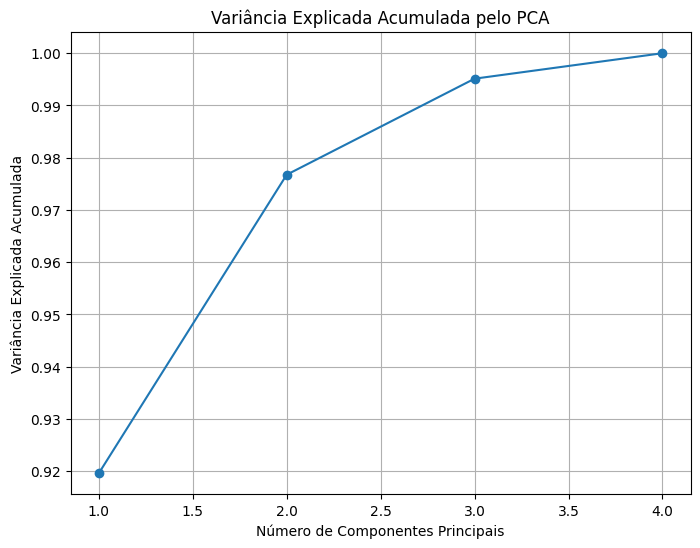

In [ ]:
# prompt: visualizar a variância acumulada do pca para saber quantas componentes escolher

# Aplicar PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train)

# Variância explicada acumulada
explained_variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)

# Plot da variância explicada acumulada
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio_cumsum) + 1), explained_variance_ratio_cumsum, marker='o')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Variância Explicada Acumulada pelo PCA')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.decomposition import PCA

# Instanciar o PCA para 2 componentes
pca = PCA(n_components=3)

In [ ]:
# Ajustar e transformar os dados
X_train_pca = pd.DataFrame(pca.fit_transform(X_train), columns=['PC1', 'PC2', 'PC3'])
X_train_pca.head()

,PC1,PC2,PC3
0,-3.171916,0.129457,0.274955
1,-2.347458,1.337815,0.271788
2,0.971521,0.486044,-0.320690
3,-2.567534,0.016052,0.086234
4,-2.950888,-0.343588,0.172321


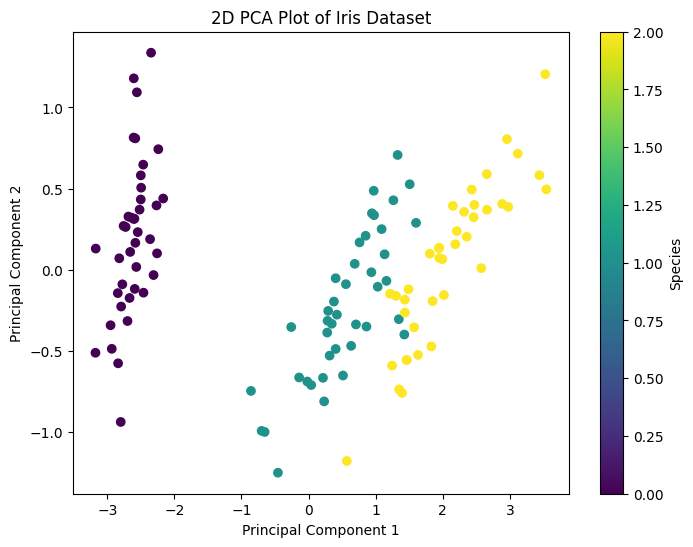

In [ ]:
# prompt: plot 2D das componentes do PCA

import matplotlib.pyplot as plt

# Plot the PCA components
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca['PC1'], X_train_pca['PC2'], c=y_train, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Plot of Iris Dataset')
plt.colorbar(label='Species')
plt.show()


In [ ]:
X_test_pca = pd.DataFrame(pca.transform(X_test), columns=['PC1', 'PC2', 'PC3'])
X_test_pca.head()

,PC1,PC2,PC3
0,0.968739,-0.161919,-0.239678
1,-2.158278,0.876517,-0.129699
2,3.840730,0.291028,-0.514723
3,0.859228,-0.146898,0.024942
4,1.377248,0.267236,-0.528182


## Treinamento, Avaliação e Ajuste de Parâmetros

### Regressão Linear

A regressão linear básica pode ser sensível a problemas de multicolinearidade e overfitting. Por isso, são frequentemente empregadas técnicas de regularização como a Ridge e a Lasso.

* Ridge Regression (L2): Adiciona uma penalidade proporcional ao quadrado dos coeficientes (norma L2). Isso reduz o tamanho dos coeficientes, mas geralmente os mantém todos no modelo.
* Lasso Regression (L1): Adiciona uma penalidade proporcional ao valor absoluto dos coeficientes (norma L1). Além de reduzir os coeficientes, pode zerar alguns deles, fazendo seleção de variáveis.
Essas técnicas ajudam a controlar o overfitting e a melhorar a generalização.

**Carregando e Pré‑processando os Dados:**

Utilizaremos o conjunto de dados Diabetes (disponível no scikit‑learn). Apresentaremos dois exemplos de pré‑processamento: um com StandardScaler e outro com MinMaxScaler.

In [25]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Carregar o dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Dividir os dados em holdout (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Exemplo A – Usando StandardScaler**

In [ ]:
# Escalonamento com StandardScaler
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std  = scaler_std.transform(X_test)


**Exemplo B – Usando MinMaxScaler**

In [ ]:
# Escalonamento com MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler_mm = MinMaxScaler()
X_train_mm = scaler_mm.fit_transform(X_train)
X_test_mm  = scaler_mm.transform(X_test)


#### Treinando Modelos de Regressão Linear com Regularização

Vamos treinar três modelos: Regressão Linear simples, Ridge e Lasso. Em cada caso, avaliaremos com divisão holdout e também por validação cruzada.

##### **Regressão Linear Sem Regularização**

Utilizando os dados escalados com StandardScaler (pode ser feito de forma similar com MinMaxScaler).

In [15]:
lr = LinearRegression()
lr.fit(X_train_std, y_train)
y_pred_lr = lr.predict(X_test_std)

# Métricas de avaliação
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print("Linear Regression (StandardScaler) - R²: {:.3f}, MAE: {:.3f}, RMSE: {:.3f}".format(r2_lr, mae_lr, rmse_lr))


Linear Regression (StandardScaler) - R²: 0.453, MAE: 42.794, RMSE: 53.853


In [16]:
lr = LinearRegression()
lr.fit(X_train_mm, y_train)
y_pred_lr_mm = lr.predict(X_test_mm)

# Métricas de avaliação
r2_lr_mm = r2_score(y_test, y_pred_lr_mm)
mae_lr_mm = mean_absolute_error(y_test, y_pred_lr_mm)
rmse_lr_mm = np.sqrt(mean_squared_error(y_test, y_pred_lr_mm))

print("Linear Regression (MinMaxScaler) - R²: {:.3f}, MAE: {:.3f}, RMSE: {:.3f}".format(r2_lr_mm, r2_lr_mm, r2_lr_mm))

Linear Regression (MinMaxScaler) - R²: 0.453, MAE: 0.453, RMSE: 0.453


Também podemos calcular a performance via validação cruzada:

In [17]:
lr = LinearRegression()

cv_scores_lr_r2 = cross_val_score(lr, X, y, cv=5, scoring='r2')
cv_scores_lr_mae = cross_val_score(lr, X, y, cv=5, scoring='neg_mean_absolute_error')
cv_scores_lr_rmse = cross_val_score(lr, X, y, cv=5, scoring='neg_root_mean_squared_error')

print("CV R² (Linear Regression): {:.3f}".format(cv_scores_lr_r2.mean()))
print("CV MAE (Linear Regression): {:.3f}".format(cv_scores_lr_mae.mean()*-1))
print("CV RMSE (Linear Regression): {:.3f}".format(cv_scores_lr_rmse.mean()*-1))


CV R² (Linear Regression): 0.482
CV MAE (Linear Regression): 44.276
CV RMSE (Linear Regression): 54.692


##### Ridge Regression (L2)

A Ridge Regression adiciona uma penalização L2 para reduzir os coeficientes sem eliminá-los. Isso é útil quando há multicolinearidade.

In [18]:
# Definir um grid para o hiperparâmetro alpha (força da regularização)
param_grid_ridge = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge = Ridge()
grid_ridge = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='r2')
grid_ridge.fit(X_train_std, y_train)
print("Melhor parâmetro Ridge:", grid_ridge.best_params_)

# Modelo com os melhores hiperparâmetros
best_ridge = grid_ridge.best_estimator_
y_pred_ridge = best_ridge.predict(X_test_std)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("Ridge Regression (StandardScaler) - R²: {:.3f}".format(r2_ridge))


Melhor parâmetro Ridge: {'alpha': 10}
Ridge Regression (StandardScaler) - R²: 0.457


In [19]:
# Definir um grid para o hiperparâmetro alpha (força da regularização)
param_grid_ridge = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge = Ridge()
grid_ridge = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='r2')
grid_ridge.fit(X_train_mm, y_train)
print("Melhor parâmetro Ridge:", grid_ridge.best_params_)

# Modelo com os melhores hiperparâmetros
best_ridge = grid_ridge.best_estimator_
y_pred_ridge = best_ridge.predict(X_test_mm)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("Ridge Regression (MinMaxScaler) - R²: {:.3f}".format(r2_ridge))

Melhor parâmetro Ridge: {'alpha': 1}
Ridge Regression (MinMaxScaler) - R²: 0.459


##### Lasso Regression (L1)

A Lasso Regression aplica penalização L1, o que pode zerar alguns coeficientes, efetivamente realizando seleção de variáveis.

In [20]:
# Definir um grid para o hiperparâmetro alpha
param_grid_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
lasso = Lasso(max_iter=10000)
grid_lasso = GridSearchCV(lasso, param_grid_lasso, cv=5, scoring='r2')
grid_lasso.fit(X_train_std, y_train)
print("Melhor parâmetro Lasso:", grid_lasso.best_params_)

# Modelo com os melhores hiperparâmetros
best_lasso = grid_lasso.best_estimator_
y_pred_lasso = best_lasso.predict(X_test_std)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("Lasso Regression (StandardScaler) - R²: {:.3f}".format(r2_lasso))


Melhor parâmetro Lasso: {'alpha': 1}
Lasso Regression (StandardScaler) - R²: 0.467


In [21]:
# Definir um grid para o hiperparâmetro alpha
param_grid_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
lasso = Lasso(max_iter=10000)
grid_lasso = GridSearchCV(lasso, param_grid_lasso, cv=5, scoring='r2')
grid_lasso.fit(X_train_mm, y_train)
print("Melhor parâmetro Lasso:", grid_lasso.best_params_)

# Modelo com os melhores hiperparâmetros
best_lasso = grid_lasso.best_estimator_
y_pred_lasso = best_lasso.predict(X_test_mm)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("Lasso Regression (MinMaxScaler) - R²: {:.3f}".format(r2_lasso))

Melhor parâmetro Lasso: {'alpha': 0.1}
Lasso Regression (MinMaxScaler) - R²: 0.461


#### Modelagem de Algoritmos de Classificação

Nas seções a seguir os algoritmos de classificação – Decision Tree, Random Forest e Logistic Regression – serão treinados utilizando exemplos com ambos os escalonadores (StandardScaler e MinMaxScaler) e avaliados com holdout e validação cruzada.

Utilizaremos o dataset Iris para estes exemplos.

In [54]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [29]:
from sklearn.datasets import load_iris
iris = load_iris()
X_cls, y_cls = iris.data, iris.target

# Divisão holdout (25% teste)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.25, random_state=42, stratify=y_cls)


**Observação**: Árvores de decisão (Decision Tree e Random Forest) geralmente não necessitam de escalonamento, mas para modelos lineares (Logistic Regression) é recomendável.

##### Decision Tree Classifier

**Treinamento com Holdout**

In [46]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42, max_depth=4, min_samples_split=5)
dt.fit(X_train_cls, y_train_cls)
y_pred_dt = dt.predict(X_test_cls)

# Calcular a matriz de confusão
cm = confusion_matrix(y_test_cls, y_pred_dt)
print("Matriz de Confusão:")
print(cm)

# Calcular métricas
accuracy = accuracy_score(y_test_cls, y_pred_dt)
precision = precision_score(y_test_cls, y_pred_dt, average='weighted')
recall = recall_score(y_test_cls, y_pred_dt, average='weighted')
f1 = f1_score(y_test_cls, y_pred_dt, average='weighted')

print(f"\nAcurácia Holdout: {accuracy}")
print(f"Precisão Holdout: {precision}")
print(f"Recall Holdout: {recall}")
print(f"F1-score Holdout: {f1}")


Matriz de Confusão:
[[12  0  0]
 [ 0 12  1]
 [ 0  2 11]]

Acurácia Holdout: 0.9210526315789473
Precisão Holdout: 0.9226190476190477
Recall Holdout: 0.9210526315789473
F1-score Holdout: 0.9209356725146198


**Validação Cruzada**

In [44]:
# Instanciar o modelo
dt = DecisionTreeClassifier(random_state=42, max_depth=4, min_samples_split=5)

# Realizar validação cruzada estratificada e obter previsões
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=646757)
y_pred = cross_val_predict(dt, X_cls, y_cls, cv=cv)

# Calcular a matriz de confusão
cm = confusion_matrix(y_cls, y_pred)
print("Matriz de Confusão:")
print(cm)

# Calcular métricas
accuracy = accuracy_score(y_cls, y_pred)
precision = precision_score(y_cls, y_pred, average='weighted')
recall = recall_score(y_cls, y_pred, average='weighted')
f1 = f1_score(y_cls, y_pred, average='weighted')

print(f"\nAcurácia: {accuracy}")
print(f"Precisão: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Matriz de Confusão:
[[50  0  0]
 [ 0 46  4]
 [ 0  3 47]]

Acurácia: 0.9533333333333334
Precisão: 0.9534480458850206
Recall: 0.9533333333333334
F1-score: 0.9533286661999534


**Ajuste de Hiperparâmetros**

In [49]:
param_grid_dt = {'max_depth': [None, 3, 4, 5, 6],
                 'min_samples_split': [2, 5, 10]}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='accuracy')
grid_dt.fit(X_train_cls, y_train_cls)
print("Melhores hiperparâmetros DT:", grid_dt.best_params_)



Melhores hiperparâmetros DT: {'max_depth': None, 'min_samples_split': 5}


In [50]:
# Realizar validação cruzada estratificada e obter previsões
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=646757)
y_pred = cross_val_predict(grid_dt, X_cls, y_cls, cv=cv)

# Calcular a matriz de confusão
cm = confusion_matrix(y_cls, y_pred)
print("Matriz de Confusão:")
print(cm)

# Calcular métricas
accuracy = accuracy_score(y_cls, y_pred)
precision = precision_score(y_cls, y_pred, average='weighted')
recall = recall_score(y_cls, y_pred, average='weighted')
f1 = f1_score(y_cls, y_pred, average='weighted')

print(f"\nAcurácia: {accuracy}")
print(f"Precisão: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Matriz de Confusão:
[[50  0  0]
 [ 0 47  3]
 [ 0  4 46]]

Acurácia: 0.9533333333333334
Precisão: 0.9534480458850206
Recall: 0.9533333333333334
F1-score: 0.9533286661999534


##### Random Forest Classifier

**Treinamento com Holdout**

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=5)
rf.fit(X_train_cls, y_train_cls)
y_pred_rf = rf.predict(X_test_cls)

# Calcular a matriz de confusão
cm = confusion_matrix(y_test_cls, y_pred_rf)
print("Matriz de Confusão:")
print(cm)

# Calcular métricas
accuracy = accuracy_score(y_test_cls, y_pred_rf)
precision = precision_score(y_test_cls, y_pred_rf, average='weighted')
recall = recall_score(y_test_cls, y_pred_rf, average='weighted')
f1 = f1_score(y_test_cls, y_pred_rf, average='weighted')

print(f"\nAcurácia Holdout: {accuracy}")
print(f"Precisão Holdout: {precision}")
print(f"Recall Holdout: {recall}")
print(f"F1-score Holdout: {f1}")


Matriz de Confusão:
[[12  0  0]
 [ 0 12  1]
 [ 0  2 11]]

Acurácia Holdout: 0.9210526315789473
Precisão Holdout: 0.9226190476190477
Recall Holdout: 0.9210526315789473
F1-score Holdout: 0.9209356725146198


**Validação Cruzada**

In [52]:
# Instanciar o modelo
rf = RandomForestClassifier(random_state=2354235, n_estimators=100, max_depth=5)

# Realizar validação cruzada estratificada e obter previsões
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=646757)
y_pred = cross_val_predict(rf, X_cls, y_cls, cv=cv)

# Calcular a matriz de confusão
cm = confusion_matrix(y_cls, y_pred)
print("Matriz de Confusão:")
print(cm)

# Calcular métricas
accuracy = accuracy_score(y_cls, y_pred)
precision = precision_score(y_cls, y_pred, average='weighted')
recall = recall_score(y_cls, y_pred, average='weighted')
f1 = f1_score(y_cls, y_pred, average='weighted')

print(f"\nAcurácia: {accuracy}")
print(f"Precisão: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Matriz de Confusão:
[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]

Acurácia: 0.96
Precisão: 0.96
Recall: 0.96
F1-score: 0.96


**Ajuste de Hiperparâmetros**

In [55]:
from scipy.stats import randint
param_dist_rf = {'n_estimators': randint(50,200),
                 'max_depth': [None, 3, 5, 7, 9]}
rand_search_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                                    param_distributions=param_dist_rf,
                                    n_iter=10, cv=5, scoring='accuracy', random_state=42)
rand_search_rf.fit(X_train_cls, y_train_cls)
print("Melhores hiperparâmetros RF:", rand_search_rf.best_params_)

Melhores hiperparâmetros RF: {'max_depth': 3, 'n_estimators': 124}


In [56]:
# Realizar validação cruzada estratificada e obter previsões
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=646757)
y_pred = cross_val_predict(rand_search_rf, X_cls, y_cls, cv=cv)

# Calcular a matriz de confusão
cm = confusion_matrix(y_cls, y_pred)
print("Matriz de Confusão:")
print(cm)

# Calcular métricas
accuracy = accuracy_score(y_cls, y_pred)
precision = precision_score(y_cls, y_pred, average='weighted')
recall = recall_score(y_cls, y_pred, average='weighted')
f1 = f1_score(y_cls, y_pred, average='weighted')

print(f"\nAcurácia: {accuracy}")
print(f"Precisão: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Matriz de Confusão:
[[50  0  0]
 [ 0 46  4]
 [ 0  3 47]]

Acurácia: 0.9533333333333334
Precisão: 0.9534480458850206
Recall: 0.9533333333333334
F1-score: 0.9533286661999534


##### Logistic Regression

Treinamento com Holdout (usando dados escalados – aqui utilizaremos ambos os scalers como exemplo)

**StandardScaler para Classificação**

In [57]:
scaler_std_cls = StandardScaler()
X_train_std_cls = scaler_std_cls.fit_transform(X_train_cls)
X_test_std_cls  = scaler_std_cls.transform(X_test_cls)


**MinMaxScaler para Classificação**

In [58]:
scaler_mm_cls = MinMaxScaler()
X_train_mm_cls = scaler_mm_cls.fit_transform(X_train_cls)
X_test_mm_cls  = scaler_mm_cls.transform(X_test_cls)


**Treinamento com Holdout**

In [59]:
from sklearn.linear_model import LogisticRegression
lr_std = LogisticRegression(random_state=42, solver='liblinear')
lr_std.fit(X_train_std_cls, y_train_cls)
y_pred_lr_std = lr_std.predict(X_test_std_cls)


# Calcular a matriz de confusão
cm = confusion_matrix(y_test_cls, y_pred_lr_std)
print("Matriz de Confusão:")
print(cm)

# Calcular métricas
accuracy = accuracy_score(y_test_cls, y_pred_lr_std)
precision = precision_score(y_test_cls, y_pred_lr_std, average='weighted')
recall = recall_score(y_test_cls, y_pred_lr_std, average='weighted')
f1 = f1_score(y_test_cls, y_pred_lr_std, average='weighted')

print(f"\nAcurácia Holdout: {accuracy}")
print(f"Precisão Holdout: {precision}")
print(f"Recall Holdout: {recall}")
print(f"F1-score Holdout: {f1}")



Matriz de Confusão:
[[11  1  0]
 [ 0  7  6]
 [ 0  2 11]]

Acurácia Holdout: 0.7631578947368421
Precisão Holdout: 0.7766253869969041
Recall Holdout: 0.7631578947368421
F1-score Holdout: 0.7611746758199849


**Com MinMaxScaler:**

In [60]:
lr_mm = LogisticRegression(random_state=42, solver='liblinear')
lr_mm.fit(X_train_mm_cls, y_train_cls)
y_pred_lr_mm = lr_mm.predict(X_test_mm_cls)

# Calcular a matriz de confusão
cm = confusion_matrix(y_test_cls, y_pred_lr_mm)
print("Matriz de Confusão:")
print(cm)

# Calcular métricas
accuracy = accuracy_score(y_test_cls, y_pred_lr_mm)
precision = precision_score(y_test_cls, y_pred_lr_mm, average='weighted')
recall = recall_score(y_test_cls, y_pred_lr_mm, average='weighted')
f1 = f1_score(y_test_cls, y_pred_lr_mm, average='weighted')

print(f"\nAcurácia Holdout: {accuracy}")
print(f"Precisão Holdout: {precision}")
print(f"Recall Holdout: {recall}")
print(f"F1-score Holdout: {f1}")


Matriz de Confusão:
[[12  0  0]
 [ 0  6  7]
 [ 0  1 12]]

Acurácia Holdout: 0.7894736842105263
Precisão Holdout: 0.8250890383854372
Recall Holdout: 0.7894736842105263
F1-score Holdout: 0.7776315789473685


**Validação Cruzada**


In [61]:
lr_std = LogisticRegression(random_state=42, solver='liblinear')

# Realizar validação cruzada estratificada e obter previsões
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=646757)
y_pred = cross_val_predict(lr_std, X_cls, y_cls, cv=cv)

# Calcular a matriz de confusão
cm = confusion_matrix(y_cls, y_pred)
print("Matriz de Confusão:")
print(cm)

# Calcular métricas
accuracy = accuracy_score(y_cls, y_pred)
precision = precision_score(y_cls, y_pred, average='weighted')
recall = recall_score(y_cls, y_pred, average='weighted')
f1 = f1_score(y_cls, y_pred, average='weighted')

print(f"\nAcurácia: {accuracy}")
print(f"Precisão: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Matriz de Confusão:
[[50  0  0]
 [ 0 45  5]
 [ 0  1 49]]

Acurácia: 0.96
Precisão: 0.9618894256575417
Recall: 0.96
F1-score: 0.9599358974358975


**Ajuste de Hiperparâmetros**

In [62]:
param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100]}
grid_lr = GridSearchCV(LogisticRegression(random_state=42, solver='liblinear'), param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train_std_cls, y_train_cls)
print("Melhor valor de C (Logistic Regression):", grid_lr.best_params_)


Melhor valor de C (Logistic Regression): {'C': 10}


In [63]:
# Realizar validação cruzada estratificada e obter previsões
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=646757)
y_pred = cross_val_predict(grid_lr, X_cls, y_cls, cv=cv)

# Calcular a matriz de confusão
cm = confusion_matrix(y_cls, y_pred)
print("Matriz de Confusão:")
print(cm)

# Calcular métricas
accuracy = accuracy_score(y_cls, y_pred)
precision = precision_score(y_cls, y_pred, average='weighted')
recall = recall_score(y_cls, y_pred, average='weighted')
f1 = f1_score(y_cls, y_pred, average='weighted')

print(f"\nAcurácia: {accuracy}")
print(f"Precisão: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Matriz de Confusão:
[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]

Acurácia: 0.9733333333333334
Precisão: 0.9738247863247864
Recall: 0.9733333333333334
F1-score: 0.9733226623982927
